Use of NLP - Natural Language Processing to classify true and fake news using the Python language with the Jupyter Notebook.

`Importing Libraries`

In [238]:
import git
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import string

from unidecode import unidecode
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import  resample

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.corpus import mac_morpho
nltk.download('mac_morpho')
nltk.download('punkt')
nltk.download('stopwords')
stopWords = stopwords.words('portuguese')

[nltk_data] Downloading package mac_morpho to
[nltk_data]     /home/devjag/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package punkt to /home/devjag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/devjag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [239]:
training = mac_morpho.tagged_sents()
tagger = nltk.UnigramTagger(training)

`Download of the corpus and data construction.`

In [240]:
localPath = 'newsFile'
if not os.path.exists(localPath):
    urlGit = 'https://github.com/roneysco/Fake.br-corpus'
    gitClone = git.Repo.clone_from(urlGit, localPath)

fake_meta_path = 'full_texts/fake-meta-information'
true_meta_path = 'full_texts/true-meta-information'
fake_normalized_path = 'size_normalized_texts/fake'
true_normalized_path = 'size_normalized_texts/true'

fakeLines = []
tempFakeLines = []
trueLines = []
tempTrueLines = []

dirListFake = os.listdir(os.path.join(localPath, fake_meta_path))
dirListFake.sort(key=lambda x: int(x.split('-')[0]))
tempDirListFake = os.listdir(os.path.join(localPath, fake_normalized_path))
tempDirListFake.sort()

dirListTrue = os.listdir(os.path.join(localPath, true_meta_path))
dirListTrue.sort(key=lambda x: int(x.split('-')[0]))
tempDirListTrue = os.listdir(os.path.join(localPath, true_normalized_path))
tempDirListFake.sort()

`Data Normalization`

In [241]:
# True data
for fileName in dirListTrue:
    with open(os.path.join(localPath + '/' + true_meta_path, fileName), 'r') as arch:
        data = [line.strip() for line in arch]
        trueLines.append([{
            'full_text_normalized': '',
            'link': data[1],
            'category': data[2],
            'number_of_links': data[6],
            'number_of_verbs': data[9],
            'number_of_si_verbs': data[10],
            'number_of_nouns': data[11],
            'number_of_adjectives': data[12],
            'number_of_adverbs': data[13],
            'number_of_modal_verbs': data[14],
            'number_of_si_pronouns': data[15],
            'number_of_plural_pronouns': data[16],
            'number_of_pronouns': data[17],
            'pausality': data[18],
            'date_of_publication': data[3],
            'file_name': fileName,
            'fake': 0
        }])

for fileName in tempDirListTrue:
    with open(os.path.join(localPath + '/' + true_normalized_path, fileName), 'r') as arch:
        tempTrueLines.append(arch.read())
for lines in range(len(tempTrueLines)):
    trueLines[lines][0]['full_text_normalized'] = tempTrueLines[lines]

# Fake data
for fileName in dirListFake:
    with open(os.path.join(localPath + '/' + fake_meta_path, fileName), 'r') as arch:
        data = [line.strip() for line in arch]
        fakeLines.append([{
            'full_text_normalized': '',
            'link': data[1],
            'category': data[2],
            'number_of_links': data[6],
            'number_of_verbs': data[9],
            'number_of_si_verbs': data[10],
            'number_of_nouns': data[11],
            'number_of_adjectives': data[12],
            'number_of_adverbs': data[13],
            'number_of_modal_verbs': data[14],
            'number_of_si_pronouns': data[15],
            'number_of_plural_pronouns': data[16],
            'number_of_pronouns': data[17],
            'pausality': data[18],
            'date_of_publication': data[3],
            'file_name': fileName,
            'fake': 1
        }])

for fileName in tempDirListFake:
    with open(os.path.join(localPath + '/' + fake_normalized_path, fileName), 'r') as arch:
        tempFakeLines.append(arch.read())
for lines in range(len(tempFakeLines)):
    fakeLines[lines][0]['full_text_normalized'] = tempFakeLines[lines]

`Data Printing`

In [242]:
fullLines = fakeLines + trueLines
col = list(fullLines[0][0].keys())
data = []
for line in fullLines:
    for i in line:
        data.append(list(i.values()))
corpusBR = pd.DataFrame(data, columns=col)
display(corpusBR)

,full_text_normalized,link,category,number_of_links,number_of_verbs,number_of_si_verbs,number_of_nouns,number_of_adjectives,number_of_adverbs,number_of_modal_verbs,number_of_si_pronouns,number_of_plural_pronouns,number_of_pronouns,pausality,date_of_publication,file_name,fake
0,Kátia Abreu diz que vai colocar sua expulsão e...,https://ceticismopolitico.com/2017/11/30/katia...,politica,120,30,1,46,7,13,5,2,0,26,2.0,2017-11-30,1-meta.txt,1
1,"Dr. Ray peita Bolsonaro, chama-o de “conservad...",https://ceticismopolitico.com/2017/11/28/blog-...,sociedade_cotidiano,187,62,1,75,13,25,7,0,0,30,3.29412,2017-11-28,2-meta.txt,1
2,Reinaldo Azevedo desmascarado pela Polícia Fed...,https://ceticismopolitico.com/2017/11/28/alckm...,politica,150,39,3,64,9,18,5,1,0,14,3.57143,2017-11-28,3-meta.txt,1
3,Relatório assustador do BNDES mostra dinheiro ...,https://ceticismopolitico.com/2017/11/28/cara-...,politica,185,42,0,84,12,11,5,0,0,23,2.33333,2017-11-28,4-meta.txt,1
4,"Radialista americano fala sobre o PT: ""Eles ve...",https://ceticismopolitico.com/2017/11/27/temer...,politica,96,20,0,36,9,8,1,0,0,12,2.63636,2017-11-27,5-meta.txt,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Coreia do Norte acusa CIA de complô para assas...,https://g1.globo.com/politica/noticia/como-a-b...,politica,720,195,4,476,128,38,21,0,0,77,3.53731,21/01/2018 09h41,3598-meta.txt,0
7196,Curta Brasília exibe filmes em realidade virtu...,https://g1.globo.com/pr/parana/noticia/alvo-da...,politica,507,187,0,352,36,49,28,0,0,42,2.96774,27/07/2017 10h49,3599-meta.txt,0
7197,Intervenção federal no RJ é a 1ª desde a Const...,https://g1.globo.com/pa/para/noticia/chefs-con...,sociedade_cotidiano,431,141,3,252,52,55,18,1,4,70,3.31707,10/11/2017 22h41,3600-meta.txt,0
7198,‘Espectro da guerra atômica paira sobre nós de...,http://politica.estadao.com.br/blogs/neumanne/...,tv_celebridades,684,197,13,360,88,69,24,0,0,104,3.11538,24 de julho de 2017,3601-meta.txt,0


In [243]:
sWords = set(stopwords.words('portuguese'))
sWordsClean = [
    'apos',
    'caso',
    'dia',
    'ter',
    'terça',
    'segunda',
    'quarta',
    'quinta',
    'segunda feira',
    'terça feira',
    'quarta feira',
    'quinta feira',
    'sexta feira'
]

sWords.update(sWordsClean)
sWordsCorpusBR = corpusBR
sWordsCorpusBR['full_text_normalized'] = corpusBR['full_text_normalized'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in sWords]))

display(corpusBR)

,full_text_normalized,link,category,number_of_links,number_of_verbs,number_of_si_verbs,number_of_nouns,number_of_adjectives,number_of_adverbs,number_of_modal_verbs,number_of_si_pronouns,number_of_plural_pronouns,number_of_pronouns,pausality,date_of_publication,file_name,fake
0,"Kátia Abreu diz vai colocar expulsão moldura, ...",https://ceticismopolitico.com/2017/11/30/katia...,politica,120,30,1,46,7,13,5,2,0,26,2.0,2017-11-30,1-meta.txt,1
1,"Dr. Ray peita Bolsonaro, chama-o “conservador ...",https://ceticismopolitico.com/2017/11/28/blog-...,sociedade_cotidiano,187,62,1,75,13,25,7,0,0,30,3.29412,2017-11-28,2-meta.txt,1
2,Reinaldo Azevedo desmascarado Polícia Federal....,https://ceticismopolitico.com/2017/11/28/alckm...,politica,150,39,3,64,9,18,5,1,0,14,3.57143,2017-11-28,3-meta.txt,1
3,Relatório assustador BNDES mostra dinheiro púb...,https://ceticismopolitico.com/2017/11/28/cara-...,politica,185,42,0,84,12,11,5,0,0,23,2.33333,2017-11-28,4-meta.txt,1
4,"Radialista americano fala sobre PT: ""Eles vend...",https://ceticismopolitico.com/2017/11/27/temer...,politica,96,20,0,36,9,8,1,0,0,12,2.63636,2017-11-27,5-meta.txt,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Coreia Norte acusa CIA complô assassinar Kim J...,https://g1.globo.com/politica/noticia/como-a-b...,politica,720,195,4,476,128,38,21,0,0,77,3.53731,21/01/2018 09h41,3598-meta.txt,0
7196,"Curta Brasília exibe filmes realidade virtual,...",https://g1.globo.com/pr/parana/noticia/alvo-da...,politica,507,187,0,352,36,49,28,0,0,42,2.96774,27/07/2017 10h49,3599-meta.txt,0
7197,Intervenção federal RJ 1ª desde Constituição 1...,https://g1.globo.com/pa/para/noticia/chefs-con...,sociedade_cotidiano,431,141,3,252,52,55,18,1,4,70,3.31707,10/11/2017 22h41,3600-meta.txt,0
7198,‘Espectro guerra atômica paira sobre novo’. Ch...,http://politica.estadao.com.br/blogs/neumanne/...,tv_celebridades,684,197,13,360,88,69,24,0,0,104,3.11538,24 de julho de 2017,3601-meta.txt,0


`Text cleaning removing words that have small semantic relevance`

In [244]:
def preprocessing(text):
    textwithaccents = unidecode(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    return textwithaccents
corpusBR['full_text_normalized'] = corpusBR['full_text_normalized'].apply(preprocessing)

`After data preprocessing, the data are individualized and trained.`

In [248]:
fakeData = corpusBR[corpusBR['fake'] == 1]
trueData = corpusBR[corpusBR['fake'] == 0]

sampleFakeData = resample(fakeData, n_samples=len(trueData), random_state=42)
balancedData = pd.concat([sampleFakeData, trueData])

resources = balancedData [[
    'full_text_normalized',
    'category',
    'number_of_links',
    'number_of_verbs',
    'number_of_si_verbs',
    'number_of_nouns',
    'number_of_adjectives',
    'number_of_adverbs',
    'number_of_modal_verbs',
    'number_of_si_pronouns',
    'number_of_plural_pronouns',
    'number_of_pronouns',
    'pausality',
    'date_of_publication'
]]

labels = balancedData['fake']
resourcesTraining, resourcesTest, labelsTraining, labelsTest = train_test_split(resources, labels, test_size=0.3, random_state=42)

sWords = stopwords.words('portuguese')
resTrainPreProcess = [preprocessing(text) for text in resourcesTraining['full_text_normalized']]
resTestPreProcess = [preprocessing(text) for text in resourcesTest['full_text_normalized']]

vector = TfidfVectorizer(stop_words=sWords)
resTrainVector = vector.fit_transform(resTrainPreProcess)
resTestVector = vector.transform(resTestPreProcess)

model = LogisticRegression()
model.fit(resTrainVector, labelsTraining)

prevision = model.predict(resTestVector)
precision = accuracy_score(labelsTest, prevision)
percent = round(precision * 100, 2)
ru = 3008547
print(f'The model has the following accuracy: {percent}% - RU: {ru}')

The model has the following accuracy: 92.08% - RU: 3008547


`Creation of word cloud with true news.`

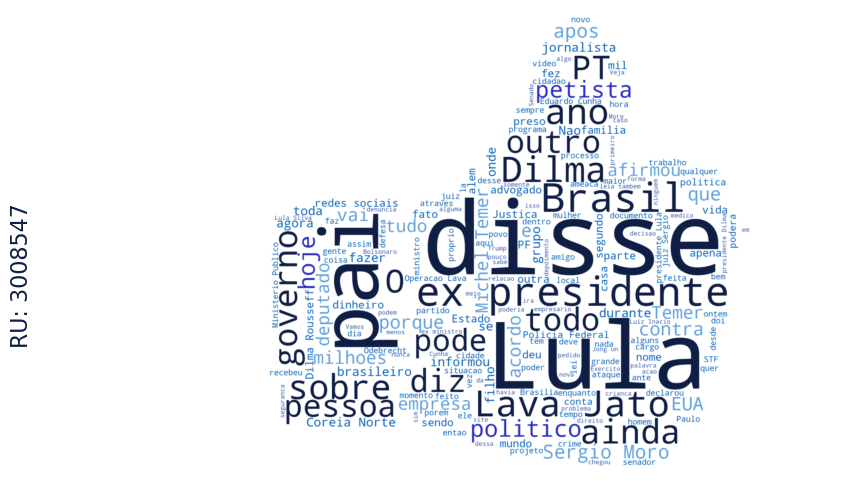

In [246]:
fakeDataStop1 = sWordsCorpusBR[sWordsCorpusBR['fake'] == 1]
allWords = ' '.join(fakeDataStop1['full_text_normalized'])

imgLike = Image.open('/home/devjag/Documents/NLP/img3.png')
imgLikeRGBA = imgLike.convert('RGBA')
mask = np.array(imgLikeRGBA)
wordCloud = WordCloud(width=1200, height=800, background_color='#FFFFFF', mask=mask)

def color(word, font_size, position, orientation, random_state=None, **kwargs):
    palette = ['#2C51A8', '#0562bb', '#5ea0dc', '#2a2ec3', '#0f1e45']
    index = min(int(font_size / 20), len(palette) - 1)
    return palette[index]
wordCloud = wordCloud.generate(allWords)
wordCloud = wordCloud.recolor(color_func=color)
imgColors = ImageColorGenerator(mask)
plt.figure(figsize=(12, 6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
ru = 'RU: 3008547'
a = -wordCloud.mask.shape[1] / 2 + 280
b = wordCloud.mask.shape[0] / 2 + 100
plt.text(a, b, ru, fontsize=16, ha='left', va='center', rotation='vertical', color='#0f1e45')

plt.show()

`Creation of word cloud with fake news`

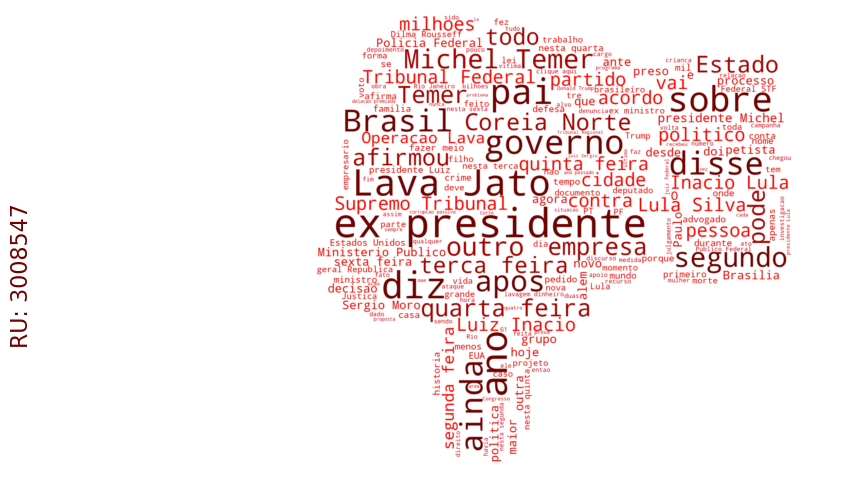

In [247]:
fakeDataStop0 = sWordsCorpusBR[sWordsCorpusBR['fake'] == 0]
allWords = ' '.join(fakeDataStop0['full_text_normalized'])
imgLike = Image.open('/home/devjag/Documents/NLP/img1.png')
imgLikeRGBA = imgLike.convert('RGBA')
mask = np.array(imgLikeRGBA)
wordCloud = WordCloud(width=1200, height=800, background_color='#FFFFFF', mask=mask)

def color2(word, font_size, position, orientation, random_state=None, **kwargs):
    palette = ['#D2000f', '#E70600', '#F80600', '#A10400', '#6E0200']
    index = min(int(font_size / 20), len(palette) - 1)
    return palette[index]
wordCloud = wordCloud.generate(allWords)
wordCloud = wordCloud.recolor(color_func=color2)
imgColor2 = ImageColorGenerator(mask)
plt.figure(figsize=(12, 6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
ru = 'RU: 3008547'
a = -wordCloud.mask.shape[1] / 2 + 280
b = wordCloud.mask.shape[0] / 2 + 100
plt.text(a, b, ru, fontsize=16, ha='left', va='center', rotation='vertical', color='#6E0200')

plt.show()